<a href="https://colab.research.google.com/github/poet-developer/plot_fits_image/blob/main/plot_fits_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

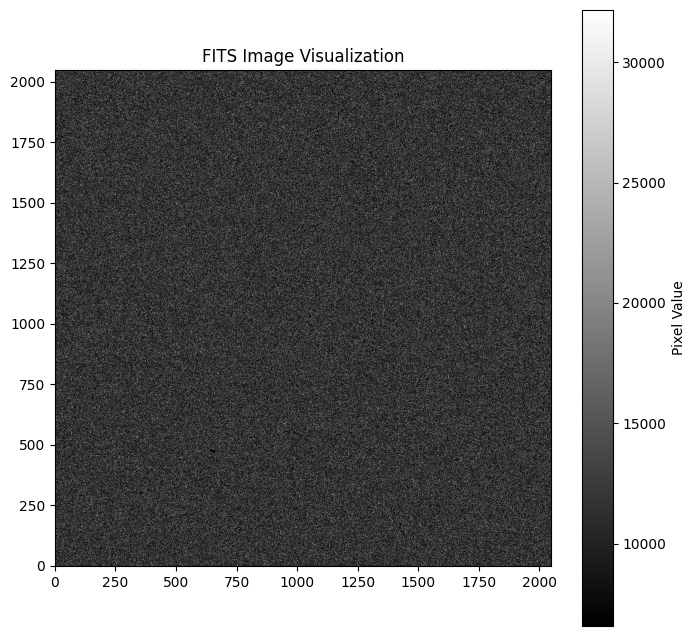

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fits_image(file_path):
    with open(file_path, "rb") as file:
        file.seek(2880)  # 헤더 부분 건너뛰기
        image_data = np.fromfile(file, dtype=np.int16)  # 16비트 정수로 읽기

    # 이미지 크기 자동 감지 (가장 가까운 정사각형 크기)
    num_pixels = image_data.size
    img_size = int(np.sqrt(num_pixels))

    # 이미지 크기가 정사각형이 아닌 경우 처리
    if img_size ** 2 != num_pixels:
        # 가장 가까운 정사각형 크기 찾기
        img_size = int(np.ceil(np.sqrt(num_pixels)))
        # 이미지 데이터를 정사각형 크기에 맞게 패딩
        padding_size = img_size ** 2 - num_pixels
        image_data = np.pad(image_data, (0, padding_size), 'constant')

    image_data = image_data.reshape((img_size, img_size))

    # 대비 조정
    max_value = np.percentile(image_data, 99)
    min_value = np.percentile(image_data, 60)

    # 이미지 출력
    plt.figure(figsize=(8, 8))
    plt.imshow(image_data, cmap='gray', origin='lower', vmax=max_value, vmin=min_value)
    plt.colorbar(label='Pixel Value')
    plt.title("FITS Image Visualization")
    plt.show()

# 사용 예시
file_path = "./object-000131.fits"
plot_fits_image(file_path)